### divide one image into 9 images and split the dataset into training, validation and test folders

In [6]:
import matplotlib.pyplot as plt
import cv2
import os
from os import listdir
import random
import shutil

(2361, 2304, 3)


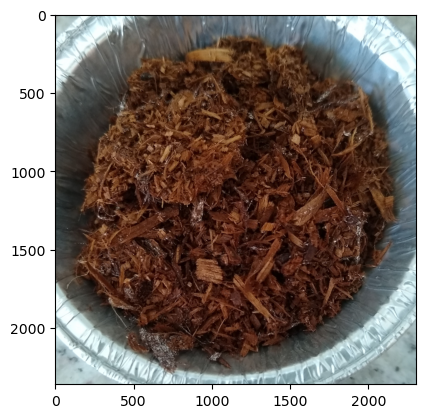

In [3]:
img = plt.imread('dataset3amostras/Frente+Umida (1).jpg')
print(img.shape)
plt.imshow(img)

([], [])

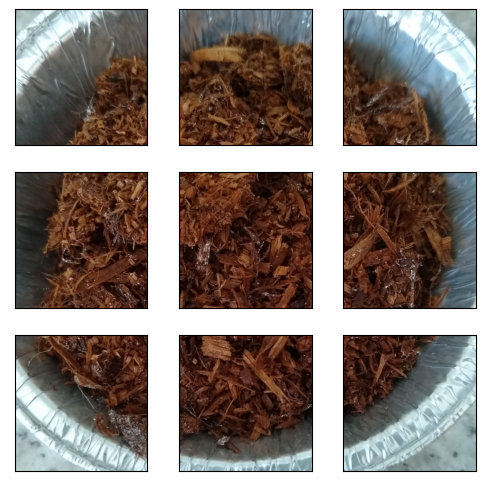

In [4]:
y_factor = img.shape[0]//3
x_factor = img.shape[1]//3

plt.figure(figsize=(6, 6))
plt.subplot(3, 3, 1)
# top right
plt.imshow(img[0:y_factor, 0:x_factor], 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])
    
plt.subplot(3, 3, 2)
# top middle
plt.imshow(img[0:y_factor, x_factor:x_factor*2], 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])
    
plt.subplot(3, 3, 3)
# top left
plt.imshow(img[0:y_factor, x_factor*2:x_factor*3], 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 4)
# middle right
plt.imshow(img[y_factor:y_factor*2,  0:x_factor], 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 5)
# middle middle
plt.imshow(img[y_factor:y_factor*2, x_factor:x_factor*2], 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 6)
# middle left
plt.imshow(img[y_factor:y_factor*2, x_factor*2:x_factor*3], 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 7)
# bottom left
plt.imshow(img[y_factor*2:y_factor*3,  0:x_factor], 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 8)
# bottom middle
plt.imshow(img[y_factor*2:y_factor*3, x_factor:x_factor*2], 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 9)
# bottom right
plt.imshow(img[y_factor*2:y_factor*3, x_factor*2:x_factor*3], 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

In [8]:
def crop_images(path_og, path_dest):
    filenames = sorted(listdir(path_og))
    size = 256
    for name in filenames:
        img=cv2.imread(path_og+"/"+name)
        y_factor=img.shape[0]//3
        x_factor=img.shape[1]//3
        
        top_left=img[0:y_factor, 0:x_factor]
        top_middle=img[0:y_factor, x_factor:x_factor*2]
        top_right=img[0:y_factor, x_factor*2:x_factor*3]
        
        middle_left=img[y_factor:y_factor*2,  0:x_factor]
        middle_middle=img[y_factor:y_factor*2, x_factor:x_factor*2]
        middle_right=img[y_factor:y_factor*2, x_factor*2:x_factor*3]
        
        bottom_left=img[y_factor*2:y_factor*3,  0:x_factor]
        bottom_middle=img[y_factor*2:y_factor*3, x_factor:x_factor*2]
        bottom_right=img[y_factor*2:y_factor*3, x_factor*2:x_factor*3]
    
        cv2.imwrite(path_dest+"/"+name.split(".")[0]+"_"+"top_right"+".jpg", cv2.resize(top_right, (size, size), interpolation = cv2.INTER_AREA))
        cv2.imwrite(path_dest+"/"+name.split(".")[0]+"_"+"top_middle"+".jpg", cv2.resize(top_middle, (size, size), interpolation = cv2.INTER_AREA))
        cv2.imwrite(path_dest+"/"+name.split(".")[0]+"_"+"top_left"+".jpg", cv2.resize(top_left, (size, size), interpolation = cv2.INTER_AREA))
        
        cv2.imwrite(path_dest+"/"+name.split(".")[0]+"_"+"middle_right"+".jpg", cv2.resize(middle_right, (size, size), interpolation = cv2.INTER_AREA))
        cv2.imwrite(path_dest+"/"+name.split(".")[0]+"_"+"middle_middle"+".jpg", cv2.resize(middle_middle, (size, size), interpolation = cv2.INTER_AREA))
        cv2.imwrite(path_dest+"/"+name.split(".")[0]+"_"+"middle_left"+".jpg", cv2.resize(middle_left, (size, size), interpolation = cv2.INTER_AREA))
        
        cv2.imwrite(path_dest+"/"+name.split(".")[0]+"_"+"bottom_left"+".jpg", cv2.resize(bottom_left, (size, size), interpolation = cv2.INTER_AREA))
        cv2.imwrite(path_dest+"/"+name.split(".")[0]+"_"+"bottom_middle"+".jpg", cv2.resize(bottom_middle, (size, size), interpolation = cv2.INTER_AREA))
        cv2.imwrite(path_dest+"/"+name.split(".")[0]+"_"+"bottom_right"+".jpg", cv2.resize(bottom_right, (size, size), interpolation = cv2.INTER_AREA))

In [6]:
os.makedirs('camas_tiles', exist_ok=True)

In [10]:
# from one dir to another, but resized
crop_images('dataset3amostras', 'camas_tiles')
crop_images('dataset4amostrasFrente+Umida', 'camas_tiles')
crop_images('dataset5amostrasMeio+Seca', 'camas_tiles')
crop_images('dataset6amostrasFundo+Intermediaria', 'camas_tiles')
crop_images('dataset7CascaAmendoim6semCentroL1', 'camas_tiles')

In [13]:
# set the path to the directory containing the images
image_dir = 'camas_tiles'

# set the percentage split for train, test, and validation sets
train_percent = 0.7
val_percent = 0.20
test_percent = 0.10

In [14]:
train_dir = 'camas_tiles_train'
test_dir = 'camas_tiles_test'
val_dir = 'camas_tiles_validation'

In [15]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [16]:
# get the list of image files in the directory
image_files = os.listdir('camas_tiles')

In [17]:
# shuffle the image files randomly
random.shuffle(image_files)

In [18]:
num_images = len(image_files)
num_train = int(train_percent * num_images)
num_test = int(test_percent * num_images)
num_val = int(val_percent * num_images)

In [19]:
num_images, num_train, num_test, num_val

(3645, 2551, 364, 729)

In [20]:
# split the image files into train, test, and validation sets
train_files = image_files[:num_train]
test_files = image_files[num_train:num_train + num_test]
val_files = image_files[num_train + num_test:]

In [21]:
for filename in train_files:
    class_name = filename.split(' ')[0]  # Assumes the class name is before the first blank space
    src_path = os.path.join(image_dir, filename)
    dst_path = os.path.join(train_dir, class_name, filename)
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    shutil.copy(src_path, dst_path)

for filename in test_files:
    class_name = filename.split(' ')[0]
    src_path = os.path.join(image_dir, filename)
    dst_path = os.path.join(test_dir, class_name, filename)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
    shutil.copy(src_path, dst_path)
    
for filename in val_files:
    class_name = filename.split(' ')[0]
    src_path = os.path.join(image_dir, filename)
    dst_path = os.path.join(val_dir, class_name, filename)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    shutil.copy(src_path, dst_path)